In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from sentence_transformers import util


import skillsnetwork

sns.set_context('notebook')
sns.set_style('white')

In [3]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plotter(x, y, title):
    plt.plot(x, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

In [4]:
sentences = ['This framework generates embeddings for each input sentence',
            'Sentences are passed as a list of string.',
            'The quick brown fox jumps over the lazy dog.']

In [5]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [6]:
embeddings = model.encode(sentences, convert_to_numpy=True) # By default, convert_to_numpy = True
embeddings.shape

(3, 384)

In [7]:
embeddings[0][:50]

array([-0.01371737, -0.04285155, -0.01562863,  0.01405372,  0.03955376,
        0.12179627,  0.02943339, -0.03175241,  0.03549598, -0.07931399,
        0.01758785, -0.040437  ,  0.04972593,  0.02549125, -0.07187009,
        0.08149686,  0.00147073,  0.04796273, -0.04503362, -0.09921747,
       -0.02817699,  0.06450462,  0.04446704, -0.0476217 , -0.03529524,
        0.04386716, -0.05285661,  0.00043304,  0.10192148,  0.01640721,
        0.03269964, -0.03459866,  0.01213393,  0.07948709,  0.00458343,
        0.01577783, -0.00968205,  0.02876256, -0.05058063, -0.01557938,
       -0.02879068, -0.00962281,  0.03155569,  0.02273489,  0.08714496,
       -0.03850271, -0.08847182, -0.00875499, -0.02123434,  0.02089235],
      dtype=float32)

# SBERT for Analyzing Semantic Textual Similarity (STS

In [8]:
sentences = ['The cat sits outside',
             'A man is playing guitar',
             'I love pasta',
             'The new movie is awesome',
             'The cat plays in the garden',
             'A woman watches TV',
             'The new movie is so great',
             'Do you like pizza?']

embeddings = model.encode(sentences, convert_to_numpy=True) 

# 𝑠𝑖𝑚𝑖𝑙𝑎𝑟𝑖𝑡𝑦=𝐴⋅𝐵||𝐴||⋅||𝐵||

In [9]:
def cosine_similarity(a, b):
    
    score = np.dot(a, b) / (norm(a) * norm(b))
    
    return score

In [10]:
cosine_similarity(embeddings[0], embeddings[1])

0.03633034

In [11]:
cosine_similarity(embeddings[3], embeddings[6])

0.89390385

In [12]:
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores.shape

torch.Size([8, 8])

In [13]:
pairs = []

for i in range(len(cosine_scores)-1): # 0, 1, 2, 3, 4, 5, 6
    for j in range(i+1, len(cosine_scores)): # 1-7, 2-7, 3-7, 4-7, 5-7, 6-7, 7
        pairs.append({'index': [i,j], 'score': cosine_scores[i][j]})
        
len(pairs)

28

In [14]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:3]:
    i, j = pair['index']
    print(f"{sentences[i]} | {sentences[j]} \n Score: {pair['score']:.2f} \n")

The new movie is awesome | The new movie is so great 
 Score: 0.89 

The cat sits outside | The cat plays in the garden 
 Score: 0.68 

I love pasta | Do you like pizza? 
 Score: 0.51 



In [16]:
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings)

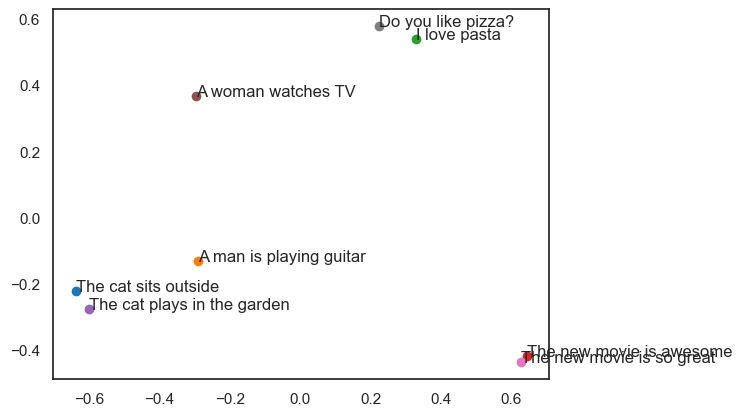

In [17]:
for coord, sentence in zip(embeddings_reduced, sentences):

    plt.scatter(coord[0], coord[1])
    plt.annotate(sentence, (coord[0], coord[1]))

# Use Case of SBERT Embeddings - Perfume Recommendation

In [19]:
skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX068IEN/data/perfume_data.tgz", overwrite=True)

<coroutine object prepare at 0x000002792D32E6C0>

In [20]:
df = pd.read_csv("./perfume_data.csv", encoding="unicode_escape")
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [21]:
list(df.Notes[0:10])

[' Vanilla bean, musks',
 ' Lavender, Yuzu, Lemongrass, Magnolia, Geranium, Jasmine, Frankincense, Myrrh',
 ' Green yuzu, green shikuwasa, sansho seed, coriander, ylang-ylang, shiso, rosewood, vetiver, hinoki, cypriol, patchouli, agarwood',
 ' tangerine,  pink pepper,  black coffee,  leather,  violet,  jasmine,  lily of the valley,  heliotrope powder,  vanilla,  amber, sandalwood,  toffee,  musk,  oakmoss',
 ' Bergamot, almond, violet, jasmine, leather, sandalwood, vanilla, tonka',
 ' Orange flower, neroli, honeysuckle, warm milk, pastry, salicylates, sandalwood, vanilla bean, heliotrope',
 ' Timur JE, Soap Foam Accord (Aldehydes & Musk), Pink Pepper, Jasmine e-pure, Rose Superessence, Lily-of-the-valley Accord, Patchouli, Moss Absolute, Sandalwood Accord & Orcanox',
 ' Tobacco, hay, elemi, copaiba, olibanum, nutmeg, black pepper, castoreum, atlas cedar, oakmoss, cognac, ambroxan, norlimbanol, cinnamon, cumin seed, ash',
 ' Saffron, champaca, fir balsam, beeswax, amber, damask rose, ro

In [22]:
df.rename(columns={"ï»¿Name": "Name"}, inplace=True)
df['Name'] = df['Brand'] + " - " + df['Name']
df.drop(labels=['Description', 'Image URL', 'Brand'], axis=1, inplace=True)
df.head()

,Name,Notes
0,Indult - Tihota Eau de Parfum,"Vanilla bean, musks"
1,Di Ser - Sola Parfum,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu..."
2,Di Ser - Kagiroi Parfum,"Green yuzu, green shikuwasa, sansho seed, cor..."
3,Montale - Velvet Fantasy Eau de Parfum,"tangerine, pink pepper, black coffee, leat..."
4,A Lab on Fire - A Blvd. Called Sunset Eau de P...,"Bergamot, almond, violet, jasmine, leather, s..."


In [23]:
df.Notes.isnull().sum()

80

In [24]:
df.dropna(inplace = True)
df.reset_index(inplace=True, drop = True)
df.shape

(2111, 2)

In [25]:
words = ["Perfume Oil", "Extrait", "Travel", "Hair", "Body", "Hand", "Intense", "Intensivo", "Oil"] # check for these words in perfume names

index_to_drop = []
for index, name in enumerate(df.Name):
    if any(word.lower() in name.lower() for word in words):
        index_to_drop.append(index)

In [26]:
df.drop(index_to_drop, axis=0, inplace=True)
df.reset_index(inplace=True, drop = True)
df.shape

(1612, 2)

# Creating Perfume Notes Embeddings

In [27]:
df.Notes = df.Notes.apply(lambda x: str(x))
notes = df.Notes.to_list()
len(notes)

1612

In [28]:
model = SentenceTransformer('all-MiniLM-L6-v2')

note_embeddings = model.encode(notes, show_progress_bar=True, batch_size=64)

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

In [29]:
print(note_embeddings.shape)

print(note_embeddings[0][:50]) # first 50 values in the embedding of "Vanilla bean, musks"

(1612, 384)
[-0.00921524 -0.00588333  0.07965603  0.01108184  0.0920339  -0.06118878
  0.06980839  0.04193391  0.01312284 -0.00108816  0.06511044 -0.08008223
  0.01984981 -0.13829458 -0.02251236 -0.00748578  0.12410549  0.06448846
  0.00684044 -0.01724513  0.04117164  0.01706347  0.00854874  0.06719033
 -0.05611396  0.01932547  0.02498643 -0.02417995 -0.03028038 -0.12058594
 -0.01737692  0.03183731  0.01314924  0.02147919 -0.10208161  0.0320526
 -0.01535685 -0.02603945  0.06542445 -0.01513855  0.01592387 -0.06788438
  0.01501888 -0.01736868 -0.06789885 -0.01907123  0.01838118 -0.0566425
 -0.00130135 -0.01895572]


# Recommending Perfumes using Cosine Similarity

In [30]:
cosine_scores = util.cos_sim(note_embeddings, note_embeddings)
cosine_scores.shape

torch.Size([1612, 1612])

In [31]:
pairs = []

for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({"index": [i,j], "score": cosine_scores[i][j]})

len(pairs)

1298466

In [32]:
pairs = []

for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({"index": [i,j], "score": cosine_scores[i][j]})

len(pairs)

1298466

In [ ]:
sorted_pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in sorted_pairs[0:10]:
    i, j = pair['index']
    print(f"{df.iloc[i, 0]} | {df.iloc[j, 0]} \n Score: {pair['score']:.2f} \n")